### Problem Statement:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. 

Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.

There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the data

In [4]:
fifa = pd.read_csv('fifa (1).csv', sep=',')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
# shape and info of the Fifa data:

fifa.shape

(18207, 60)

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
# Dropping columns:

fifa.drop(columns=['Photo','Flag','Club Logo'], inplace=True)

In [8]:
fifa.Nationality.nunique()

164

In [11]:
fifa.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

### Conversion of Columns

In [7]:
# 1. Converting Value to numeric:

fifa['Value'] = fifa['Value'].replace({'K':'*1e3', 'M':'*1e6','€':''}, regex=True).map(pd.eval)
fifa['Value'] = pd.to_numeric(fifa['Value'], errors='coerce')

In [8]:
# 2. Conversion of Wage Column:

fifa['Wage'] = fifa['Wage'].replace({'K':'*1e3', 'M':'*1e6','€':''}, regex=True).map(pd.eval)
fifa['Wage'] = pd.to_numeric(fifa['Wage'], errors='coerce')

In [9]:
# 3. Conversion of Release Clause Column:

fifa['Release Clause']= fifa['Release Clause'].fillna(0).replace({'K':'*1e3', 'M':'*1e6','€':''}, regex=True).map(pd.eval).astype(float)

In [10]:
fifa['Release Clause'] = fifa['Release Clause'].replace({0:fifa['Release Clause'].median()})

In [11]:
# 4. Converting Height column to Float:

fifa['Height'] = fifa['Height'].astype(str).apply(lambda x:x.replace("'",'.'))
fifa.Height = pd.to_numeric(fifa.Height, errors = 'coerce', downcast = 'float')

In [12]:
# 5. Converting Weight column to Float:

fifa['Weight'] = fifa['Weight'].astype(str).apply(lambda x:x.replace('lbs',''))
fifa.Weight = pd.to_numeric(fifa.Weight, errors = 'coerce')

In [13]:
fifa[['Value', 'Wage','Release Clause','Weight','Height']].dtypes

Value             float64
Wage              float64
Release Clause    float64
Weight            float64
Height            float32
dtype: object

In [14]:
fifa[['Value', 'Wage','Release Clause','Weight','Height']]

,Value,Wage,Release Clause,Weight,Height
0,110500000.0,565000.0,226500000.0,159.0,5.70
1,77000000.0,405000.0,127100000.0,183.0,6.20
2,118500000.0,290000.0,228100000.0,150.0,5.90
3,72000000.0,260000.0,138600000.0,168.0,6.40
4,102000000.0,355000.0,196400000.0,154.0,5.11
...,...,...,...,...,...
18202,60000.0,1000.0,143000.0,134.0,5.90
18203,60000.0,1000.0,113000.0,170.0,6.30
18204,60000.0,1000.0,165000.0,148.0,5.80
18205,60000.0,1000.0,143000.0,154.0,5.10


In [15]:
# 5.Convert 'Joined' cols to date:

fifa['Joined'] = pd.to_datetime(fifa['Joined'])


In [16]:
fifa['Joined_Year']=fifa['Joined'].dt.year

In [17]:
# 6.Convert 'Contract Valid Until' cols to date:

fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [18]:
fifa['Contract_Valid_Year']=fifa['Contract Valid Until'].dt.year

In [19]:
# Checking for Null Values

fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

### Imputation for null value:

In [20]:
cat_var = fifa.dtypes[(fifa.dtypes == 'object') | (fifa.dtypes == 'datetime64[ns]' )].index.to_list()
cat_var

['Name',
 'Club',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Joined',
 'Loaned From',
 'Contract Valid Until']

In [21]:
# Imputation for null value:
cont_var = fifa.dtypes[(fifa.dtypes != 'object') & (fifa.dtypes!='datetime64[ns]')].index.to_list()
print(cont_var)

['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Joined_Year', 'Contract_Valid_Year']


In [22]:
# Replacing missing Continuous Variables with Median:

for i in cont_var:
    fifa[i].fillna(fifa[i].median(), inplace=True)

In [23]:
# Replacing missing Categorical Variables with Mode:

for i in cat_var:
    fifa[i].fillna(fifa[i].mode().iloc[0], inplace=True)

In [24]:
# checking again for null values:

fifa.isnull().sum()

ID                          0
Name                        0
Age                         0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

In [25]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      18207 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Preferred Foot            18207 non-null  object        
 9   International Reputation  18207 non-null  float64       
 10  Weak Foot                 18207 non-null  float64       
 11  Skill Moves               18207 non-null  float64       
 12  Work Rate         

-------------

### 1. Plot the distribution of Overall rating for all players. 


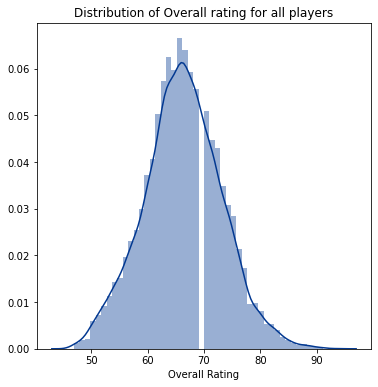

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(fifa.Overall, color='#023891')
plt.xlabel('Overall Rating')
plt.title('Distribution of Overall rating for all players')
plt.show()

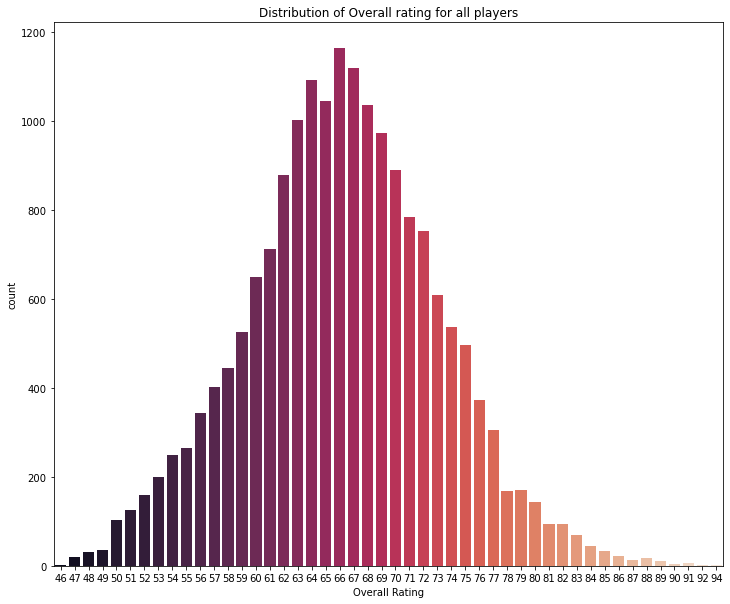

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(fifa['Overall'], palette='rocket')
plt.xlabel('Overall Rating')
plt.title('Distribution of Overall rating for all players')
plt.show()

The average overall rating of the players is 66. 

-------------

### 2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause



In [24]:
df.corr()

,Overall,International Reputation
Overall,1.000000,0.499491
International Reputation,0.499491,1.000000


In [25]:
df = fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]

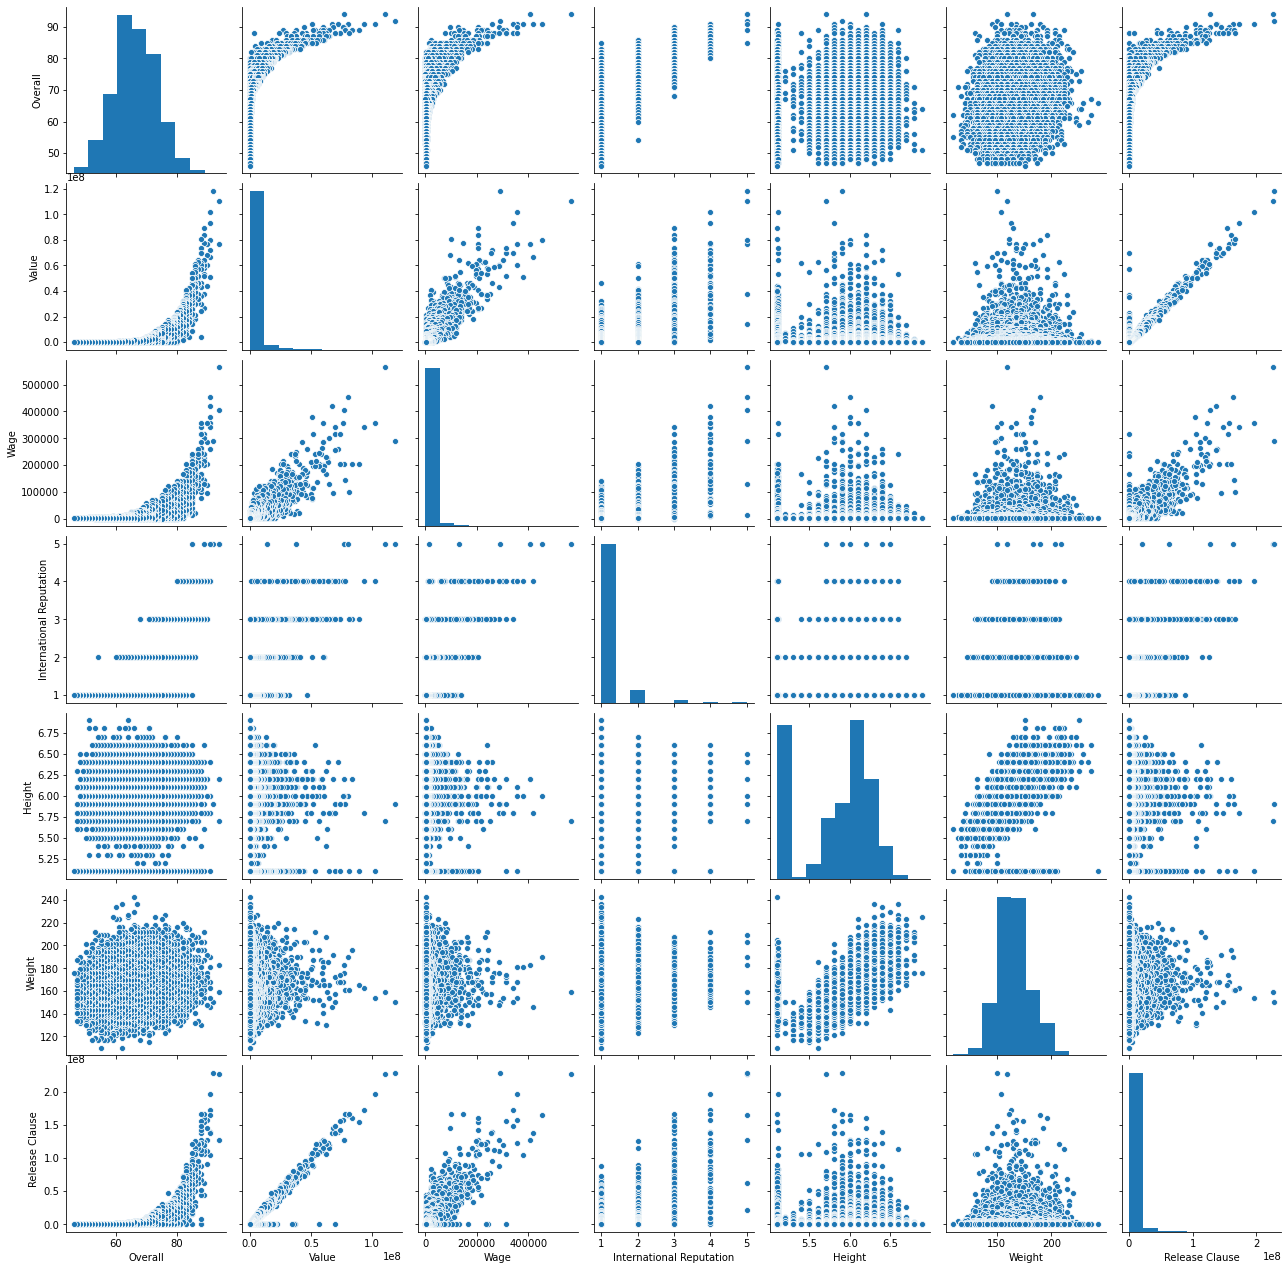

In [28]:
sns.pairplot(df)
plt.show()

#### Observations:
    
1. There is positive linear relationship between Overall Rating and Value. We can see from the scatterplot as the overall rating of the player increases, so does the Value of the player. There is ~79% correlation between overall rating and value. Similarly, there is positive linear relationship between Overall and Wage.
2. International Reputation has no linear relationship with any other variables Overall rating, Value, Wage, Height, Weight and Release Clause. Once International reputation was recognized for certain parameter, it remained stagnant.
3. Both Height and Weight has no linear relationship with Value, Wage and Release Clause. 
4. Value and Release Clause clear positive and increasing linear relationship.
5. Value and Wage also have linear relationship.


-------------

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [29]:
df1 = fifa.loc[fifa['Contract_Valid_Year']==2020].sort_values(by='Overall', ascending=False).reset_index(drop=True).head(20)
df1

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year,Contract_Valid_Year
0,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2011.0,2020.0
1,177003,L. Modrić,32,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2012.0,2020.0
2,155862,Sergio Ramos,32,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2005.0,2020.0
3,183277,E. Hazard,27,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2012.0,2020.0
4,168542,David Silva,32,90,90,Manchester City,60000000.0,285000.0,Left,4.0,...,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2010.0,2020.0
5,179813,E. Cavani,31,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,...,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2013.0,2020.0
6,138956,G. Chiellini,33,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2005.0,2020.0
7,190460,C. Eriksen,26,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,...,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2013.0,2020.0
8,164240,Thiago Silva,33,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,...,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,2012.0,2020.0
9,175943,D. Mertens,31,87,87,Napoli,45000000.0,135000.0,Right,3.0,...,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0,2013.0,2020.0


In [30]:
df1.shape

(20, 58)

### a. What would the average wage for this set of players be?

In [31]:
df1.Wage.mean()

205450.0

In [32]:
print("The average wage of top 20 players based on their overall score and whose contract expires in 2020 is €205450.0")

The average wage of top 20 players based on their overall score and whose contract expires in 2020 is €205450.0


### b. What is the average age?

In [33]:
df1.Age.mean()

30.65

In [34]:
print("The average age of top 20 players based on their overall score and whose contract expires in 2020 is 30.65years")

The average age of top 20 players based on their overall score and whose contract expires in 2020 is 30.65years


### c. Is there a correlation between the Overall rating and Value for these players?

In [35]:
df1_subset = df1[['Overall','Value']]
df1_subset.corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


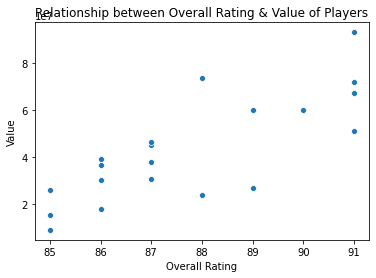

In [36]:
sns.scatterplot(x='Overall', y='Value', data=df1)
plt.title('Relationship between Overall Rating & Value of Players')
plt.xlabel('Overall Rating')
plt.show()

Yes, there is positive linear relationship between Overall Rating and Value. We can see from the scatterplot as the overall rating of the player increases, so does the Value of the player. There is ~79% correlation between overall rating and value.

-------------

### 4. Generate tables containing the top 5 players by Overall rating for each unique position.



In [50]:
df2 = fifa.groupby(['Position'])[['Position','Overall','Wage']].head()
df2.sort_values(by=['Position','Overall','Wage'], ascending = [True, False, True]).reset_index(drop=True)

,Position,Overall,Wage
0,CAM,89,145000.0
1,CAM,88,205000.0
2,CAM,86,135000.0
3,CAM,86,190000.0
4,CAM,86,195000.0
...,...,...,...
130,ST,94,405000.0
131,ST,90,205000.0
132,ST,89,205000.0
133,ST,89,300000.0


### a. Are there any players appearing in more than one Table. Please point out such players.

In [68]:
a = fifa['Name'].value_counts()

In [76]:
print(a[a>1].index.to_list())

['J. Rodríguez', 'Paulinho', 'J. Williams', 'R. Williams', 'J. Gómez', 'J. Valencia', 'Felipe', 'J. Hernández', 'A. Traoré', 'Danilo', 'M. Gómez', 'J. Jones', 'J. Martínez', 'D. Williams', 'J. Torres', 'L. López', 'M. Smith', 'L. Rodríguez', 'J. Pérez', 'J. Murillo', 'M. Pedersen', 'M. Dembélé', 'J. García', 'M. López', 'D. Schmidt', 'J. Mosquera', 'J. Aguirre', 'L. Martínez', 'R. Taylor', 'G. Rodríguez', 'A. González', 'Y. Kobayashi', 'L. Kelly', 'J. Brown', 'D. Rodríguez', 'F. Rodríguez', 'J. Murphy', 'J. Clarke', 'A. Ba', 'Álvaro', 'M. Herrera', 'R. González', 'Carlitos', 'Fernando', 'J. Medina', 'M. García', 'K. Nakamura', 'D. Johnson', 'Joaquín', 'J. Ramírez', 'A. Diallo', 'J. Quiñones', 'R. Bennett', 'D. Jones', 'Manu García', 'R. Edwards', 'A. Taylor', 'C. Evans', 'J. Allen', 'J. Muñoz', 'J. McCarthy', 'C. Brown', 'Guilherme', 'M. Martínez', 'Camacho', 'A. Correa', 'Serginho', 'J. Lewis', 'João Pedro', 'S. Moore', 'R. Torres', 'A. Sánchez', 'C. Gutiérrez', 'B. White', 'Charles',

### b. What is the average wage one can expect to pay for the top 5 in every position

In [51]:
df2.groupby(['Position'])[['Wage']].mean()

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0


-------------